<a href="https://colab.research.google.com/github/dmainagithub/dmainagithub/blob/main/Clustering_Exercise_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Sample data
data = {
    'Hypertension': [1, 0, 1, 1, 0, 1, 0],
    'Diabetes': [0, 1, 1, 1, 0, 0, 1],
    'Heart Disease': [1, 0, 0, 1, 0, 1, 0],
    'Arthritis': [0, 1, 0, 1, 1, 0, 0],
    'Asthma': [0, 0, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)
print(df)


   Hypertension  Diabetes  Heart Disease  Arthritis  Asthma
0             1         0              1          0       0
1             0         1              0          1       0
2             1         1              0          0       1
3             1         1              1          1       0
4             0         0              0          1       1
5             1         0              1          0       0
6             0         1              0          0       1


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [3]:
from sklearn.cluster import KMeans
import numpy as np

# Choosing the number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(df_scaled)

# Adding cluster labels to the dataframe
df['Cluster'] = clusters
print(df)


   Hypertension  Diabetes  Heart Disease  Arthritis  Asthma  Cluster
0             1         0              1          0       0        1
1             0         1              0          1       0        0
2             1         1              0          0       1        2
3             1         1              1          1       0        1
4             0         0              0          1       1        0
5             1         0              1          0       0        1
6             0         1              0          0       1        2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [4]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_scaled, clusters)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.33304029854555717


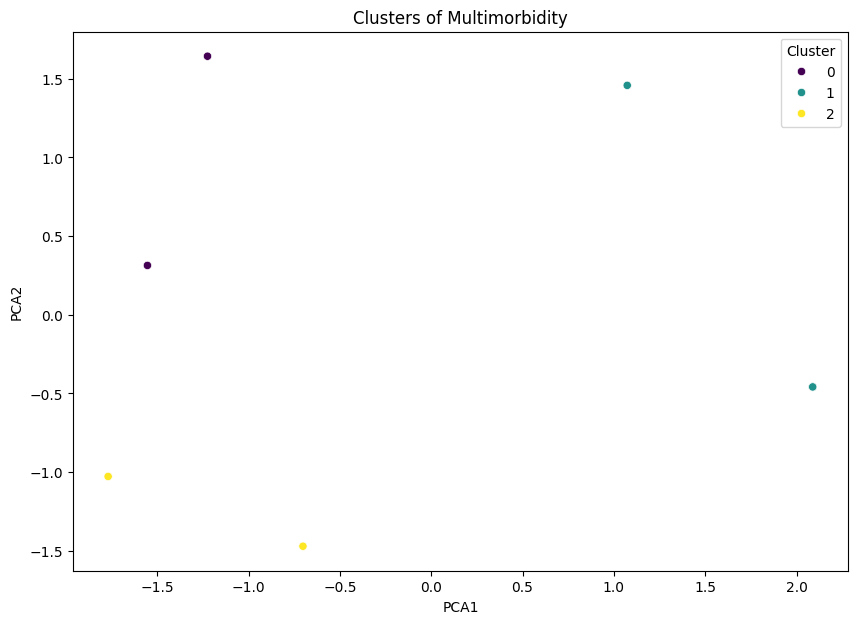

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Adding the PCA results to the dataframe
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

# Plotting the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of Multimorbidity')
plt.show()


In [6]:
# Grouping by clusters to see the common diseases in each cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


         Hypertension  Diabetes  Heart Disease  Arthritis  Asthma      PCA1  \
Cluster                                                                       
0                 0.0  0.500000            0.0   1.000000     0.5 -1.389242   
1                 1.0  0.333333            1.0   0.333333     0.0  1.749855   
2                 0.5  1.000000            0.0   0.000000     1.0 -1.235540   

             PCA2  
Cluster            
0        0.978364  
1        0.180379  
2       -1.248932  


In [7]:
# Grouping by clusters to see the common diseases in each cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


         Hypertension  Diabetes  Heart Disease  Arthritis  Asthma      PCA1  \
Cluster                                                                       
0                 0.0  0.500000            0.0   1.000000     0.5 -1.389242   
1                 1.0  0.333333            1.0   0.333333     0.0  1.749855   
2                 0.5  1.000000            0.0   0.000000     1.0 -1.235540   

             PCA2  
Cluster            
0        0.978364  
1        0.180379  
2       -1.248932  


In [8]:
# Grouping by clusters to see the common diseases in each cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


         Hypertension  Diabetes  Heart Disease  Arthritis  Asthma      PCA1  \
Cluster                                                                       
0                 0.0  0.500000            0.0   1.000000     0.5 -1.389242   
1                 1.0  0.333333            1.0   0.333333     0.0  1.749855   
2                 0.5  1.000000            0.0   0.000000     1.0 -1.235540   

             PCA2  
Cluster            
0        0.978364  
1        0.180379  
2       -1.248932  
